<a href="https://colab.research.google.com/github/rutasnim/DataViz/blob/main/CSAT_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Powerwall Installation Customer Satisfaction Analysis**

In this notebook, I explored the custom feedback after powerwall installation. My goal was to find insights to improve customer satisfaction.

Following insights were found:


In [ ]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


In [369]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load Data and  clean

In [ ]:
#load the data
#Mounting at google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [344]:
data = pd.read_excel("/content/gdrive/MyDrive/datasets/Data.xlsx")
data.head()

,Response Date,Email,Distribution Date\n,Commissioning Date,Country,Name,Transaction Entity,Installer Company,Project Name,Project Type,...,Please explain:.1,"How would you rate the sales process? \n(1 = Poor, 5 = Excellent)",How can we improve the sales process? Select all that apply,"How would you rate the installation process? \n(1 = Poor, 5 = Excellent)",How can we improve the installation process? Select all that apply,Please explain:.2,What has been your experience with the Tesla App? Select all that apply,What is preventing you from using the Tesla App?,We would like your candid feedback on how we can improve. Please provide any additional thoughts below.,We would like to invite you to participate in the Tesla Customer Experience Program. (Y/N)
0,2018-09-19 15:14:16,***Removed***,2018-09-19,2018-09-04,AU,***Removed***,CI,***Removed***,***Removed***,Powerwall,...,NaN,NaN,NaN,5.0,NaN,NaN,I love it,NaN,Make it available via the web portal as well.,Yes
1,2018-09-19 15:06:33,***Removed***,2018-09-19,2018-08-08,US,***Removed***,CI,***Removed***,***Removed***,Powerwall,...,NaN,5.0,NaN,5.0,NaN,NaN,I wish there was more information on how to us...,NaN,NaN,Yes
2,2018-09-19 15:05:24,***Removed***,2018-09-19,2018-08-28,AU,***Removed***,CI,***Removed***,***Removed***,Powerwall,...,NaN,5.0,NaN,5.0,NaN,NaN,It's difficult to find and check my historic e...,NaN,Better historical usage information would be g...,Yes
3,2018-09-19 15:00:58,***Removed***,2018-09-19,2018-08-30,AU,***Removed***,CI,***Removed***,***Removed***,Powerwall,...,NaN,5.0,NaN,5.0,NaN,NaN,I love it,NaN,Our Powerwall 2 was fitted 3 weeks ago. Batter...,Yes
4,2018-09-19 14:58:10,***Removed***,2018-09-19,2018-09-12,AU,***Removed***,CI,***Removed***,***Removed***,Powerwall,...,NaN,5.0,NaN,4.0,Communication before the start of work,NaN,I love it,NaN,NaN,No


In [ ]:
# Display size of the data
print(data.shape)

(146, 27)


### Remove columns with no information

In [346]:
data=data.drop(['Response Date','Email','Name','Transaction Entity','Installer Company','Project Name','Project Type', 'Why did you purchase Powerwall?  Select all that apply (EMEA Version)'], axis=1)


In [ ]:
print(data.shape)

(146, 19)


This dataframe has many columns. Let's get the index of multiple columns by creating a dictionary that maps column names to their corresponding indices.

In [ ]:
# Display column names with slicing
col_index_map = {col_name:i for i, col_name in enumerate(data.columns)}
print(col_index_map)

{'Distribution Date\n': 0, 'Commissioning Date': 1, 'Country': 2, 'Serial Numbers': 3, 'Site Number': 4, 'How would you rate your overall Powerwall experience from purchase to your system coming online?  (1 = Poor, 5 = Excellent)': 5, 'Why did you purchase Powerwall?  Select all that apply\n(APAC/NA Version)': 6, 'Please explain:': 7, 'Before installation, did you get enough information about Powerwall and features?': 8, 'Please explain:.1': 9, 'How would you rate the sales process?  \n(1 = Poor, 5 = Excellent)': 10, 'How can we improve the sales process? Select all that apply': 11, 'How would you rate the installation process?  \n(1 = Poor, 5 = Excellent)': 12, 'How can we improve the installation process? Select all that apply': 13, 'Please explain:.2': 14, 'What has been your experience with the Tesla App? Select all that apply': 15, 'What is preventing you from using the Tesla App?': 16, 'We would like your candid feedback on how we can improve. Please provide any additional though

## **Descriptive Stats Analysis**

In [347]:
data.describe()

,"How would you rate your overall Powerwall experience from purchase to your system coming online? (1 = Poor, 5 = Excellent)","How would you rate the sales process? \n(1 = Poor, 5 = Excellent)","How would you rate the installation process? \n(1 = Poor, 5 = Excellent)"
count,146.000000,145.000000,144.000000
mean,4.219178,4.248276,4.493056
std,1.135588,1.050998,0.953437
min,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000
50%,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000



The installation process boasts an impressive average rating of **4.49**, reflecting its high quality. In contrast, the sales process garners an average rating of **4.25**, suggesting that there is room for improvement in this aspect.

## Ploting all the ratings

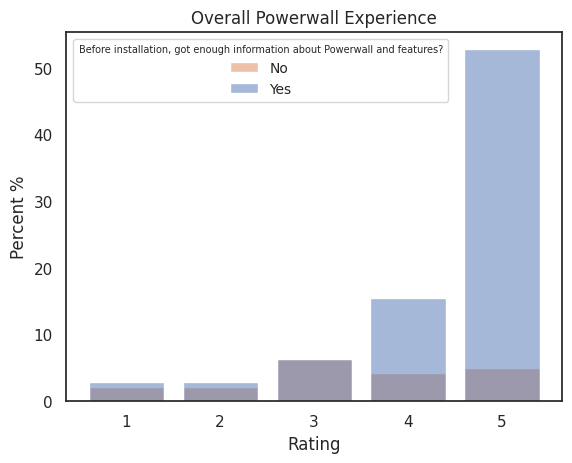

In [368]:
# Ploting Ratings
sns.set(style="white")
p=sns.histplot(data, x=data.iloc[:,5], stat="percent", hue=data.iloc[:,8],shrink=0.8, discrete=True,legend=False)
plt.legend(title='Before installation, got enough information about Powerwall and features?',title_fontsize=7,fontsize="10", loc='upper left', labels=['No', 'Yes'])
plt.title('Overall Powerwall Experience')
plt.xlabel('Rating')
plt.ylabel('Percent %')
plt.show(p)

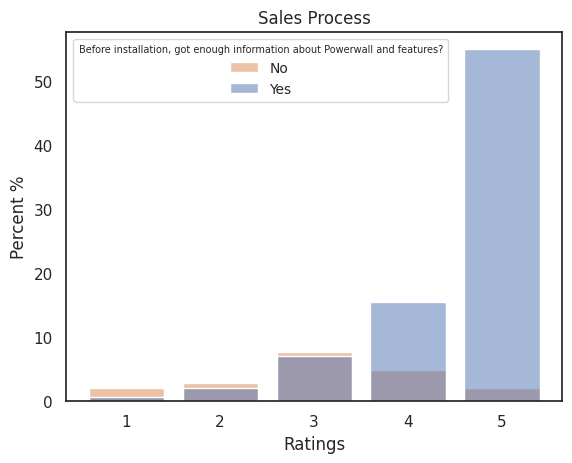

In [ ]:
p=sns.histplot(data, x=data.iloc[:,10], stat="percent", hue=data.iloc[:,8],shrink=0.8, discrete=True,legend=False)
plt.legend(title='Before installation, got enough information about Powerwall and features?',title_fontsize=7,fontsize="10", loc='upper left', labels=['No', 'Yes'])
plt.title('Sales Process')
plt.xlabel('Ratings')
plt.ylabel('Percent %')
plt.show(p)

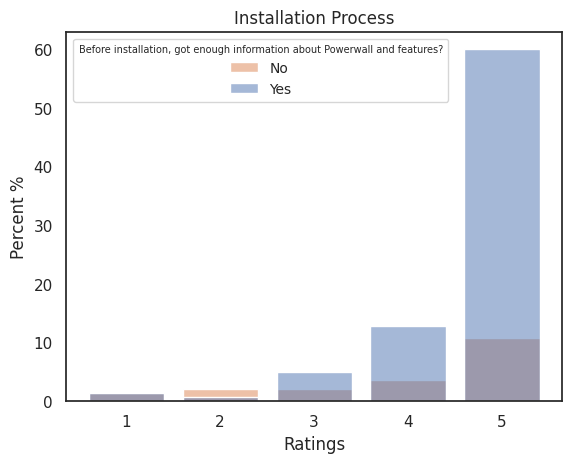

In [348]:
p=sns.histplot(data, x=data.iloc[:,12], stat="percent", hue=data.iloc[:,8],shrink=0.8, discrete=True,legend=False)
plt.legend(title='Before installation, got enough information about Powerwall and features?',title_fontsize=7,fontsize="10", loc='upper left', labels=['No', 'Yes'])
plt.title('Installation Process')
plt.xlabel('Ratings')
plt.ylabel('Percent %')
plt.show(p)

In [ ]:
df=data.explode('What has been your experience with the Tesla App? Select all that apply')

In [ ]:
df['What has been your experience with the Tesla App? Select all that apply'].unique()

array(['I love it', 'I wish there was more information on how to use it',
       "It's difficult to find and check my historic energy use",
       'I love it,I wish there was more information on how to use it',
       "I love it,It's difficult to find and check my historic energy use",
       "It's difficult to find and check my historic energy use,I wish there was more information on how to use it",
       nan, "I don't use the app"], dtype=object)

In [ ]:
df['new']=df['What has been your experience with the Tesla App? Select all that apply'].str.split(',')
df['neww']=df['new'].str.split(',')

In [ ]:
df['new'][8]

['I love it', 'I wish there was more information on how to use it']

In [ ]:
df1=df.explode('new', ignore_index=True)

In [ ]:
df1['new']


0                                              I love it
1      I wish there was more information on how to us...
2      It's difficult to find and check my historic e...
3                                              I love it
4                                              I love it
                             ...                        
156                                            I love it
157                                            I love it
158                                            I love it
159                                            I love it
160                                            I love it
Name: new, Length: 161, dtype: object

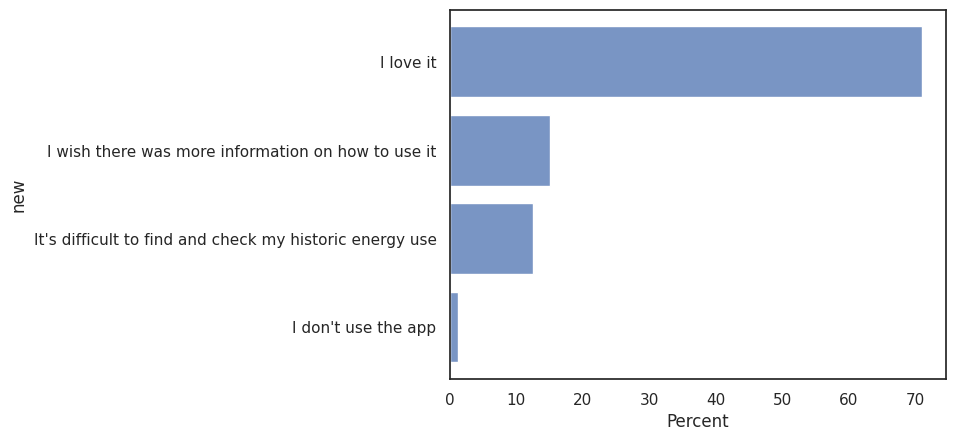

In [ ]:
g=sns.histplot(data=df1, stat='percent', y=df1['new'], discrete=True, shrink=0.8)
g.xlabel=None
g.tick_params(which='major')
plt.show(g)

<Axes: >

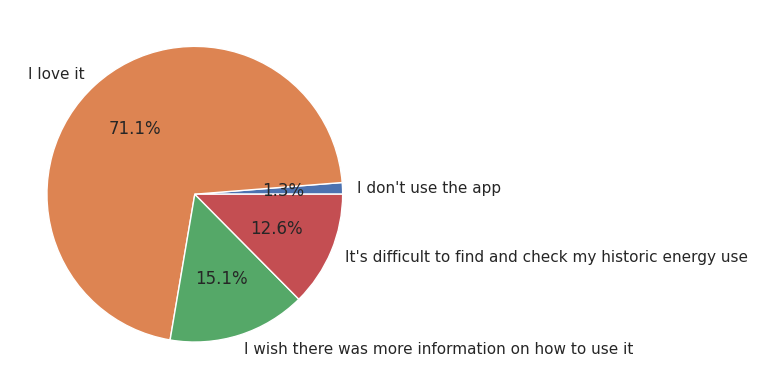

In [ ]:
df1.groupby('new').size().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
data['sales improvement']=data['How can we improve the sales process? Select all that apply'].str.split(',')
data['sales improvement']

0                         NaN
1                         NaN
2                         NaN
3                         NaN
4                         NaN
                ...          
141    [Communication, Other]
142                       NaN
143                       NaN
144                   [Other]
145     [Product Explanation]
Name: sales improvement, Length: 146, dtype: object

In [ ]:
df2=data.explode('sales improvement', ignore_index=True)

In [ ]:
df2['sales improvement'].unique()

array([nan, 'Product Explanation', 'Communication', 'Other',
       'Professionalism'], dtype=object)

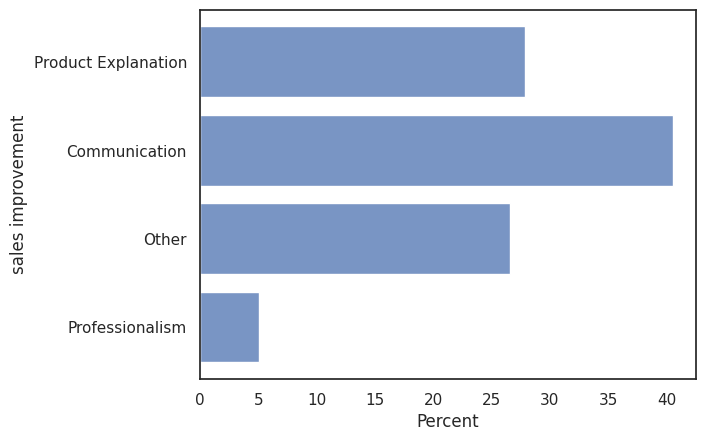

In [ ]:
g=sns.histplot(data=df1, stat='percent', y=df2['sales improvement'], discrete=True, shrink=0.8)
g.xlabel=None
g.tick_params(which='major')
plt.show(g)

<Axes: title={'center': 'Sales improvement Feedback'}>

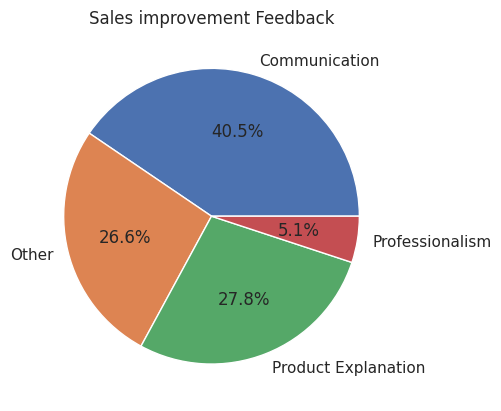

In [ ]:
df2.groupby('sales improvement').size().plot(kind='pie', autopct='%1.1f%%', title='Sales improvement Feedback')

In [ ]:
data['install']=data['How can we improve the installation process? Select all that apply'].str.split(',')
df3=data.explode('install', ignore_index=True)

<Axes: title={'center': 'Installation feedback'}>

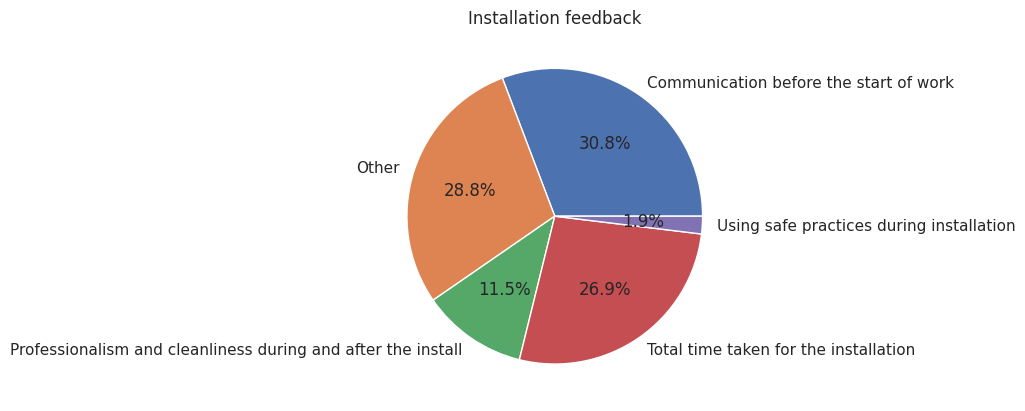

In [ ]:
df3.groupby('install').size().plot(kind='pie', autopct='%1.1f%%', title='Installation feedback')

## **Correlation Analysis**

In [ ]:
#Lets find out if the distribution day and comminsion date has any impact on the rating?
data['Diff_Commission_Distribution_dates']= (data['Distribution Date\n']- data['Commissioning Date']).dt.days


In [ ]:
#encode yes:1, No: 1 for the column, Have you received enough information about powerwall and features?
data['Before installation, did you get enough information about Powerwall and features?'] = data['Before installation, did you get enough information about Powerwall and features?'].map({'Yes': 1, 'No': 0})

In [ ]:
data.corr()

<ipython-input-339-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,"How would you rate your overall Powerwall experience from purchase to your system coming online? (1 = Poor, 5 = Excellent)","Before installation, did you get enough information about Powerwall and features?","How would you rate the sales process? \n(1 = Poor, 5 = Excellent)","How would you rate the installation process? \n(1 = Poor, 5 = Excellent)",Difference_Commission_Distribution_days,Diff_Commission_Distribution_dates
"How would you rate your overall Powerwall experience from purchase to your system coming online? (1 = Poor, 5 = Excellent)",1.000000,0.352218,0.594177,0.642338,0.049393,0.049393
"Before installation, did you get enough information about Powerwall and features?",0.352218,1.000000,0.532225,0.258741,0.169261,0.169261
"How would you rate the sales process? \n(1 = Poor, 5 = Excellent)",0.594177,0.532225,1.000000,0.494304,0.078310,0.078310
"How would you rate the installation process? \n(1 = Poor, 5 = Excellent)",0.642338,0.258741,0.494304,1.000000,-0.028613,-0.028613
Difference_Commission_Distribution_days,0.049393,0.169261,0.078310,-0.028613,1.000000,1.000000
Diff_Commission_Distribution_dates,0.049393,0.169261,0.078310,-0.028613,1.000000,1.000000


## Feedback text word from all the bad ratings (<3 )

In [357]:
# Filter out the good reviews
filter=(data.iloc[:,5]<3)&(data.iloc[:,10]<3)&(data.iloc[:,12]<3)
filtered_data= data[filter]

In [361]:
filtered_data['We would like your candid feedback on how we can improve. Please provide any additional thoughts below.']

69     I had to find the number for Technical Support...
102    1. Realistic timelines for delivery and instal...
107    promised instalation 3-4 months delivered afte...
Name: We would like your candid feedback on how we can improve. Please provide any additional thoughts below., dtype: object

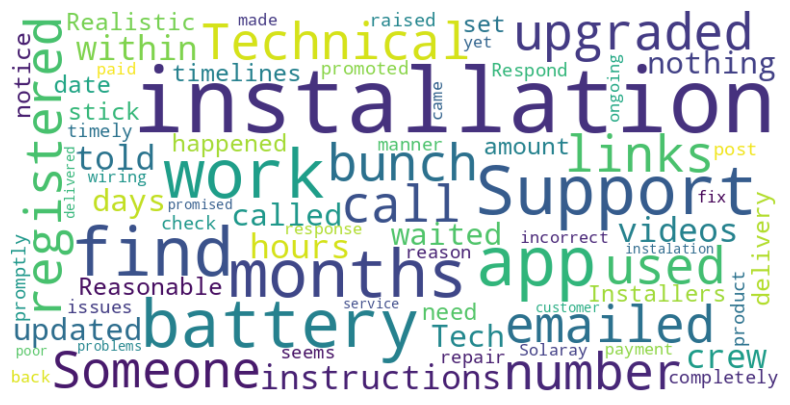

In [359]:
#data
feedback ={'Feedback': filtered_data['We would like your candid feedback on how we can improve. Please provide any additional thoughts below.']}

# Create a DataFrame from your data
df = pd.DataFrame(feedback)
df=df.dropna()

# Combine text from the 'Feedback' column into a single string
feedback_text = ' '.join([row for row in df['Feedback']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()


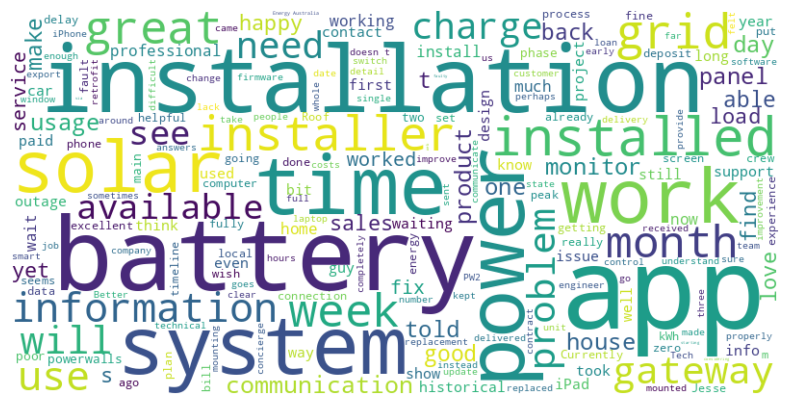

In [363]:
#data
feedback ={'Feedback': data['We would like your candid feedback on how we can improve. Please provide any additional thoughts below.']}

# Create a DataFrame from your data
df = pd.DataFrame(feedback)
df=df.dropna()

# Combine text from the 'Feedback' column into a single string
feedback_text = ' '.join([row for row in df['Feedback']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
feedback ={'Feedback': data.iloc[:,17]}
# Create a DataFrame from your data (replace 'data' with your actual DataFrame)
df = pd.DataFrame(feedback)

# Combine text from the 'Feedback' column into a single string
feedback_text = [' '.join([row for row in df['Feedback']])]
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feedback_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()


TypeError: ignored

In [ ]:
df['Feedback']

0          Make it available via the web portal as well.
1                                                    NaN
2      Better historical usage information would be g...
3      Our Powerwall 2 was fitted 3 weeks ago. Batter...
4                                                    NaN
                             ...                        
141    The installers (BSA) were excellent, ie. profe...
142    Please fully document the REST API exposed loc...
143                                                  NaN
144    If I’m careful with how much I charge my car, ...
145                                                  NaN
Name: Feedback, Length: 146, dtype: object

In [ ]:
print(df.dtypes)

Feedback    object
dtype: object


In [ ]:
df=df.dropna()
df

,Feedback
0,Make it available via the web portal as well.
2,Better historical usage information would be g...
3,Our Powerwall 2 was fitted 3 weeks ago. Batter...
5,I really would like to see the product work pr...
6,All info was received from the installers. Whi...
...,...
139,Great app. Improvement would be to integrate ...
140,Our local guy Jesse Bird has been more than he...
141,"The installers (BSA) were excellent, ie. profe..."
142,Please fully document the REST API exposed loc...


In [ ]:
feedback_text = ' '.join([row for row in df['Feedback']])
feedback_text

'Make it available via the web portal as well. Better historical usage information would be good. Also having a portable connected power monitor for specific power outlets would be great.  Our Powerwall 2 was fitted 3 weeks ago. Battery has not worked since it was installed. 3 days after installation we were informed battery was faulty and needed to be replaced. Replacement battery to be delivered to installer in one week. That was over 2 weeks ago and our installer still has not received the replacement battery. We are not happy with the after sales service. We have requested the battery be removed and replaced with a LG Chem or a full refund.  We are seriously considering starting a social media website warning future customers of the lack of back up support for this product from Tesla. We know it is not the installer as we have been included in all the emails requesting the replacement and a time frame.  I really would like to see the product work properly. Currently it doesn’t work

In [ ]:
from wordcloud import STOPWORDS
stop_words = STOPWORDS.update(["Tesla", "Powerwall"])

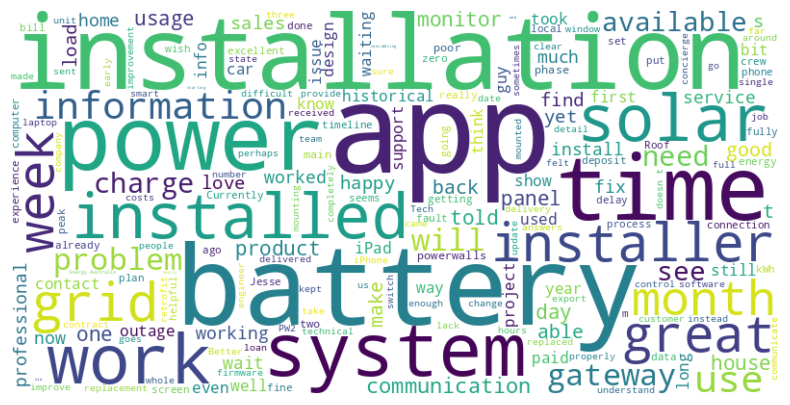

In [ ]:
wordcloud = WordCloud(width=800, height=400,random_state=1,stopwords= stop_words,background_color='white').generate(feedback_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()


In [ ]:
data.iloc[:,17]

0          Make it available via the web portal as well.
1                                                    NaN
2      Better historical usage information would be g...
3      Our Powerwall 2 was fitted 3 weeks ago. Batter...
4                                                    NaN
                             ...                        
141    The installers (BSA) were excellent, ie. profe...
142    Please fully document the REST API exposed loc...
143                                                  NaN
144    If I’m careful with how much I charge my car, ...
145                                                  NaN
Name: We would like your candid feedback on how we can improve. Please provide any additional thoughts below., Length: 146, dtype: object

In [ ]:
feedback ={'Feedback': data.iloc[:,17]}